In [ ]:
#!unzip "drive/MyDrive/Found DOg/dog-breed-identification.zip" -d "drive/MyDrive/Found DOg/"

In [ ]:
# Import tensorflow in colab
import tensorflow as tf
import tensorflow_hub as hub

# checking is GPU available or not
print("GPU",tf.config.list_physical_devices("GPU"))
print(hub.__version__)

GPU [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
0.12.0


## Getting our data ready (turning into tensors)

With all Machine leraning models, our data has to be in numerical format.
So thats what we going to do first, Turning our images into tensors(numerical Representation)

In [ ]:
# checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Found DOg/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


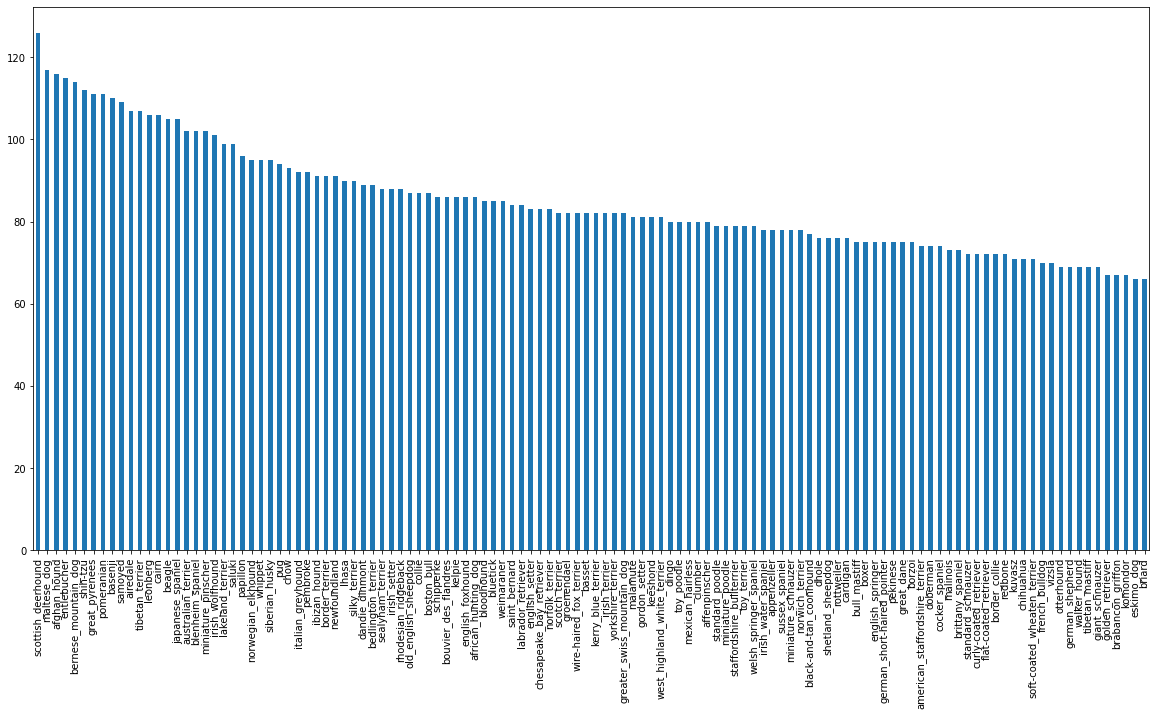

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


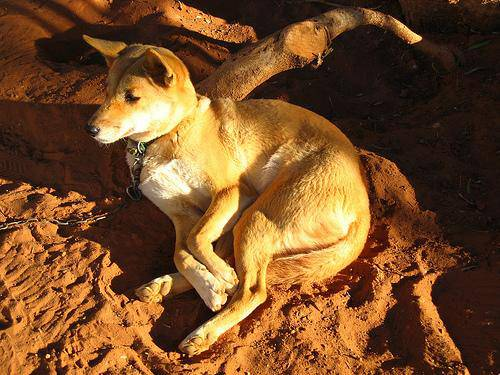

In [ ]:
# Lets view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Found DOg/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")  # use ctrl+shift+space to open documentary

### Getting images and their labels

Lets get a list of all of our image file pathnames

In [ ]:
# create pathname from image ID's
filenames = ["/content/drive/MyDrive/Found DOg/train/" + fname+ ".jpg" for fname in labels_csv["id"]]
# breed = [brd for brd in labels_csv["breed"]]
# check the first 10
filenames[:10]

# We have done to easy our work so we dont need to go back to copy path we can directly take from here

['/content/drive/MyDrive/Found DOg/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Found DOg/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Found DOg/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Found DOg/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Found DOg/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Found DOg/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Found DOg/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Found DOg/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Found DOg/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Found DOg/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filename matches of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Found DOg/train/")) == len(filenames):
  print("Correct")
else:
  print("Incorrect")

Correct


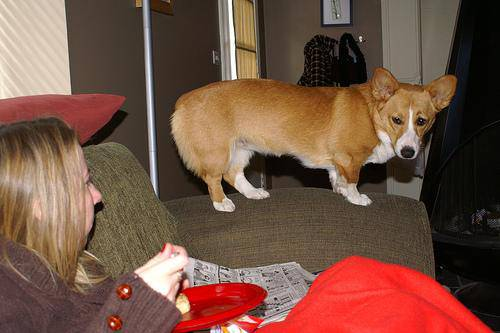

In [ ]:
# one more check
Image(filenames[10000])


In [ ]:
labels_csv["breed"][10000]

'pembroke'

Since we got now our traning image filepath as list , lets prepare label

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
# labels = labels_csv["breed"].to_numpy()
# do same thing as above codes convert it to attay


In [ ]:
len(labels)

10222

In [ ]:
# see if no. of labels matches the no. of filenames
if len(labels)==len(filenames):
  print('equal')

equal


Find the unique label value means there are more thank 10k dogs but there are only 120 breed so we are using unique element to find that 120 breed and make it a label

In [ ]:
unique_breeds=np.unique(labels)
unique_breeds
# len(unique_breeds)


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

Turn a single label into booleans 
(means to check where our searched dog matches with photo one) 

In [ ]:
print(labels[0])
labels[0] == unique_breeds




boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# lets do for every array turn every label to boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Turning boolean into integer

In [ ]:
print(labels[0])
print(np.where(unique_breeds == labels[0])) # This is index where label occur which we ask for
print(boolean_labels[0].argmax()) #index where lavel occur in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label is

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our Validation sets
Since the dataset from kaggle doesnt come with validation set, we are going to create our own

In [ ]:
# Set up X and y variable
x = filenames
y = boolean_labels #Boolean labels acts as an OneHotEncoder so you don't really need to convert them to numerical form


## **Why can't we use unique_breed or labels as y or why we using boolean_labels as y**


**We should convert our data into numeric format before training them with our Neural Network. If you could see closely we use boolean only for our labels.**

We're going to start of experimenting whith ~1000 images and increase as needed

In [ ]:
# Set the no. of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000,step:1000}

In [ ]:
# lets split our data intro train and validation sets
from sklearn.model_selection import train_test_split

# split them into train and validation
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                 y[:NUM_IMAGES],
                                                 test_size=0.2,
                                                 random_state=42)#random seed

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# lets take a look with x and y variable
x[:4],y[:2]

(['/content/drive/MyDrive/Found DOg/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
  '/content/drive/MyDrive/Found DOg/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
  '/content/drive/MyDrive/Found DOg/train/001cdf01b096e06d78e9e5112d419397.jpg',
  '/content/drive/MyDrive/Found DOg/train/00214f311d5d2247d5dfe4fe24b2303d.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, Fals

## Preprocessing Image*( turning image into Tensors)*



In [ ]:
# convert image to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(),image.min()

(255, 0)

##### by the way image look like this in tensorflow

In [ ]:
# to convert into tensors use tf.constant

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

#### *Now we've seen what an image looks like a tensor, lets make a function to preprocess them*

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing image
def process_image(image_path):
  """
  Takes an image file path and turn the image into tensors
  """

  # Read in an image file
  image = tf.io.read_file(image_path)
  # turn the jpeg image into numerical tensor with 3 colour channel
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel value from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) # instead value betwenn 0-255 now its between 0-1
  # This type of process working in it more efficient ,Its called   normalization 
  
  # Resize the image to our desire value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
  return image

In [ ]:
  process_image(filenames[43]) # example

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6932511 , 0.6422707 , 0.50893736],
        [0.7049195 , 0.6539391 , 0.51668423],
        [0.7189601 , 0.66415447, 0.5268996 ],
        ...,
        [0.28510195, 0.23804314, 0.19098432],
        [0.23658979, 0.18953097, 0.14247213],
        [0.17295183, 0.13373615, 0.08667732]],

       [[0.68057597, 0.6295956 , 0.49626228],
        [0.69162816, 0.64064777, 0.50731444],
        [0.706784  , 0.6519783 , 0.51481974],
        ...,
        [0.29755813, 0.2504993 , 0.20344049],
        [0.24967629, 0.20261747, 0.15555863],
        [0.18719192, 0.14797622, 0.10091741]],

       [[0.6738776 , 0.6228972 , 0.49740702],
        [0.6841212 , 0.6331408 , 0.5004377 ],
        [0.7016797 , 0.64304876, 0.51417094],
        ...,
        [0.25748226, 0.21042345, 0.16336462],
        [0.23216338, 0.18510455, 0.13804573],
        [0.17874685, 0.13953117, 0.09247234]],

       ...,

       [[0.56411815, 0.5932849 , 0.50466436],
        [0.66

## Turning our data into batches

In [ ]:
# Create a simple function to return a tuple (image,label)
def get_image_label(image_path, label):
  """
  Takes an  image file path name and associated label,
  processes the image and returns a type of (image, label)
  """
  image = process_image(image_path)
  return image,label

In [ ]:
# Demo of the above
# (process_image(x[42]),(y[42]))
 # y is not in tensor in above code but we can convert it by on tensor by this
(process_image(x[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we have got a way to turn our data into tuples of Tensors in the form of : `(image,label)`,let's make a function to turn all our data (x & y) into batches!

In [ ]:
# Define the batch size, 32 is a good start btw tensorflow is default to 32
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
   """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accept the test data as input (no labels).

  y=None because TEST DATA most of the times dont have labels thats why we use none as y
  """
  # If the data is test dataset, we definitely dont have labels
   if test_data:
   
    print("Creating test data batches.....")
    # here dataset is creating
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) #Only filepaths (no labels)
    # here batch is creating
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  
  # If data is valid dataset we dont need to shuffle it
   elif valid_data:
        print("Creating validation data batches...")
        # creating dataset
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),#filepath
                                                  tf.constant(y)))# labels
        data_batch = data.map(get_image_label).batch(batch_size)  
        return data_batch
   # trainaing databatch
   else:
      print("Creating Training data batches...")
      # Turn filepaths and labels and Tensors
      data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                 tf.constant(y)))   
      
      # Shuffle the pathnames and labels before mapping image processor function is faster than shuffling image   
      data = data.shuffle(buffer_size=len(x))  #  buffer size equal to the full size of the dataset.

      # Create (image, label) tuples ( this also turn the image path into a preprocessed image)
      data = data.map(get_image_label)

      # Turn the training data into  batches
      data_batch = data.batch(batch_size)
      return data_batch


## Why we need no labels in training set

####  Ultimately a supervised model is intended to predict the target variable on some unlabelled data (that's the whole point) so of course one can apply the model to some unlabelled "test" data.

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val , valid_data=True)

Creating Training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attribuite of our data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Why we need to shuffle data (in deep)?
**We shuffle the training data in order to remove any potential order from with the data as it's imported.**

# Visualizing Data Batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels): #just to hint images = filenames
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    plt.subplots_adjust(left=0.1,   # second method two space
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

In [ ]:
labels[:4]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick'], dtype=object)

To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we've got to unwind it.

We can do so by calling the as_numpy_iterator() method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to next() will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

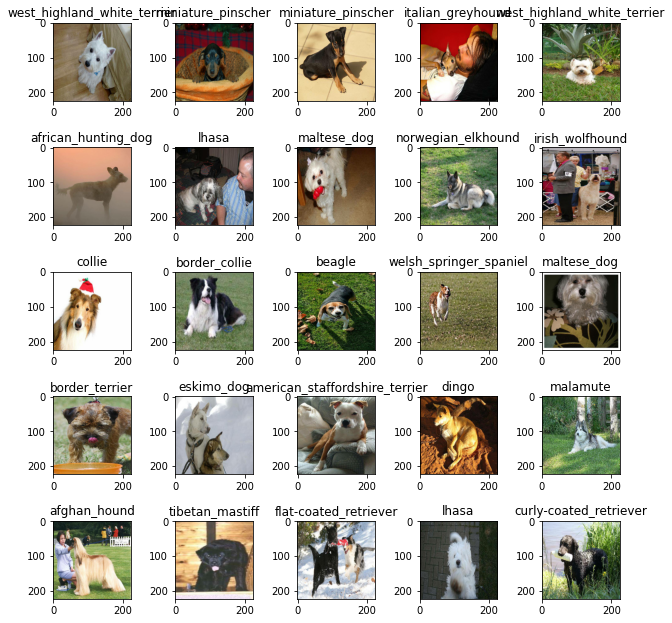

In [ ]:
# COnverting batch to normal iterator so we can represent it on graph
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

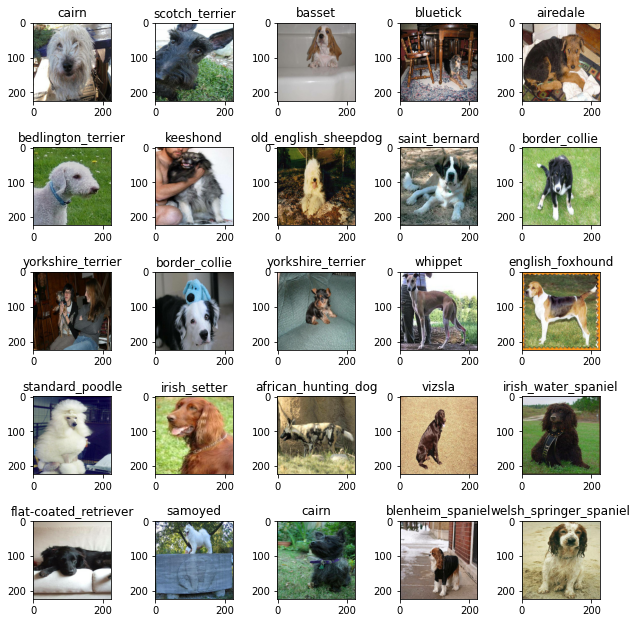

In [ ]:
# this will not shuffle like above at every load as it is visualize dataset
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

# **Creating and training a model**




In [ ]:
# Set up input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
# batch, height, width, color channel

OUTPUT_SHAPE =len(unique_breeds) # number of unique breed labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
IMG_SIZE

224

In [ ]:
# Create the function which build a keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url= MODEL_URL):
  print("Building model with:", MODEL_URL)

  # setup the model layers

  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL), # Layer 1 
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE, # we dont need output like mobilev2 model so thats why we write this line to tell we need output like this
                                                     activation="softmax") # Layer 2 (output layer) # convert no. between 0 & 1
  ])

  # Compile the model

  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(), # Our model want to reduce this (how wrong its guesses are) # its just like how good our model is guessing (for myself- its just like predicting)
      optimizer = tf.keras.optimizers.Adam(),  # A friend telling our model how to improve its guesses (for myself - its just like hypertuning)
      metrics = ["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of input it'll be getting

  return model

# Compiling the model



In [ ]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### **Early stopping  callback**

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stop improving.





In [ ]:
# Create early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)


In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}
# 1 epoch giving our model 1 chance to see training data and then do the validation
# Genereally giving chances our model to learn pattern

In [ ]:
# Check to make sure we're still running on gpu
print("GPU" , "avaailable (YESSS!!!!)" if tf.config.list_physical_devices("GPU") else "not")

GPU avaailable (YESSS!!!!)


# **Function which trains a model**



In [ ]:
# Build a function to train and return trained model

def train_model():
  '''
  Trains a given model and return the trained version.
  '''

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to data passing it the callback we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  
# Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 165s 6s/step - loss: 4.6409 - accuracy: 0.0913 - val_loss: 3.4605 - val_accuracy: 0.2200
Epoch 2/100
25/25 [==============================] - 3s 121ms/step - loss: 1.6547 - accuracy: 0.6812 - val_loss: 2.1971 - val_accuracy: 0.4750
Epoch 3/100
25/25 [==============================] - 3s 120ms/step - loss: 0.5755 - accuracy: 0.9450 - val_loss: 1.6684 - val_accuracy: 0.5900
Epoch 4/100
25/25 [==============================] - 3s 121ms/step - loss: 0.2554 - accuracy: 0.9875 - val_loss: 1.5068 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 3s 123ms/step - loss: 0.1491 - accuracy: 0.9962 - val_loss: 1.4215 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 3s 123ms/step - loss: 0.1017 - accuracy: 0.9987 - val_loss: 1.3852 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================]

it looks like our model is overfitting because its performing far better in training dataset rather than validation data set , what are some ways to prevent model overfitting in deep learing neutral network?

**Note** Overfitting is good thing as our model is start learing!!!!

## **Make and evaluating predictions using a trained model**

In [ ]:
# Make prediction on validation data (not used to train on)

# it will look the images and predict the data ((None, 224, 224, 3) to the actual labels (None, 120)
predictions = model.predict(val_data,verbose=1) 
# val_data = create_data_batches(x_val, y_val , valid_data=True)

# Verbosity mode, 0 or 1. steps : Number of steps (batches of samples) before finishing the prediction. Ignored with the default value of None . callbacks : List of callbacks to apply during prediction
# Verbose=0 (silent)
# Verbose=1 (progress bar)

predictions

7/7 [==============================] - 1s 109ms/step


array([[4.58273164e-04, 2.79680156e-04, 1.89797464e-03, ...,
        2.57136358e-04, 2.68584736e-05, 5.88964391e-03],
       [9.36579308e-04, 2.16201181e-04, 4.83425101e-03, ...,
        1.06167099e-04, 3.63180996e-04, 3.51531235e-05],
       [1.44308215e-05, 3.56490591e-06, 1.22278352e-05, ...,
        1.23272075e-05, 1.90509563e-05, 6.21546569e-05],
       ...,
       [1.47133380e-06, 6.01969587e-05, 4.25877188e-05, ...,
        1.68207646e-06, 7.48605453e-05, 9.82898782e-05],
       [2.03690468e-03, 7.91879793e-05, 2.49066390e-04, ...,
        4.67893115e-04, 2.03412274e-05, 2.15161359e-03],
       [5.50245568e-05, 2.00052564e-05, 6.21094441e-05, ...,
        1.16031466e-03, 5.51263744e-04, 7.16799186e-05]], dtype=float32)

In [ ]:
predictions[0]

array([4.58273164e-04, 2.79680156e-04, 1.89797464e-03, 2.42717957e-04,
       5.22527953e-05, 5.51159246e-06, 3.82008031e-02, 3.43148102e-04,
       1.33601614e-04, 6.48092537e-04, 2.84971262e-04, 1.58364477e-04,
       1.12609196e-04, 4.97489236e-05, 8.21890135e-04, 2.99300504e-04,
       5.52802449e-05, 8.50180238e-02, 1.26397339e-04, 4.59639632e-05,
       1.36772427e-03, 3.07498907e-04, 1.38572523e-05, 1.72319100e-03,
       3.52011812e-05, 1.29762839e-03, 3.89397919e-01, 3.90004789e-05,
       3.54582764e-04, 6.07166323e-04, 5.69008334e-05, 5.92903409e-04,
       1.45098788e-03, 4.11446763e-06, 2.04348962e-05, 3.78899649e-02,
       6.25610846e-05, 4.12341396e-05, 3.04659014e-04, 1.28584608e-04,
       1.52926228e-03, 1.90420615e-05, 5.78373074e-05, 1.02945902e-04,
       2.14404172e-05, 6.48995556e-05, 3.16543810e-05, 2.68993608e-04,
       1.02795800e-03, 3.13183438e-04, 4.33254572e-05, 1.27215826e-04,
       1.34501679e-04, 1.28792017e-04, 1.49757820e-04, 3.09920797e-05,
      

In [ ]:
predictions.shape # shape 200= len(y_val) and 120 = len(unique_label)
# its the probability value here for every single label as our model thing what certain image it is

# predictions[0] its for one image where it compare it probability with every unique label

# the value of predictions is between (0-1) as we have used softmax and softmax function genereally convert all value between 0-1 and if we add every value it will sum up to 1

(200, 120)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
len(y_val)

200

In [ ]:
# First prediction
index = 69 #[label no.]
print(predictions[0])
print(f'Max value (probability of prediction:{np.max(predictions[0])}')
print(f'sum:{np.sum(predictions[index])}')
print(f'Max index:{np.argmax(predictions[index])}')
print(f'Predicted label: {unique_breeds[np.argmax(predictions[index])]}')

[4.58273164e-04 2.79680156e-04 1.89797464e-03 2.42717957e-04
 5.22527953e-05 5.51159246e-06 3.82008031e-02 3.43148102e-04
 1.33601614e-04 6.48092537e-04 2.84971262e-04 1.58364477e-04
 1.12609196e-04 4.97489236e-05 8.21890135e-04 2.99300504e-04
 5.52802449e-05 8.50180238e-02 1.26397339e-04 4.59639632e-05
 1.36772427e-03 3.07498907e-04 1.38572523e-05 1.72319100e-03
 3.52011812e-05 1.29762839e-03 3.89397919e-01 3.90004789e-05
 3.54582764e-04 6.07166323e-04 5.69008334e-05 5.92903409e-04
 1.45098788e-03 4.11446763e-06 2.04348962e-05 3.78899649e-02
 6.25610846e-05 4.12341396e-05 3.04659014e-04 1.28584608e-04
 1.52926228e-03 1.90420615e-05 5.78373074e-05 1.02945902e-04
 2.14404172e-05 6.48995556e-05 3.16543810e-05 2.68993608e-04
 1.02795800e-03 3.13183438e-04 4.33254572e-05 1.27215826e-04
 1.34501679e-04 1.28792017e-04 1.49757820e-04 3.09920797e-05
 4.19274293e-04 2.63184588e-03 6.26481269e-05 1.06969148e-01
 3.13097320e-04 5.65224618e-05 1.20047876e-03 2.87279545e-05
 4.84618387e-04 6.830424

In [ ]:
unique_breeds[57]

'irish_terrier'

*Having the above functionality is great but we want to be able to do it at scale*

And it would be even better if we could see the image the prediction is being made on:

**Note** Prediction probability are also known as confidence levels.

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]
  # Get a predicted label based on an array of prediction probabilities 
pred_label = get_pred_label(predictions[69])
pred_label

'silky_terrier'

In [ ]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Now since our validation data is still in a batch dataset , we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels)

In [ ]:

# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image,label) Tensors and returns seperate arrays of images and labels.
  """
  images=[]
  labels=[]

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    # In TensorFlow 2.0 you can unbatch a tf.data.Dataset by calling the .unbatch() function.
      images.append(image)
      labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(labels[69])

'affenpinscher'

In [ ]:
get_pred_label(predictions[69])

'silky_terrier'

In [ ]:
get_pred_label(labels[69])==get_pred_label(predictions[69])


False



We'll create a function which:
* Takes an array of prediction probabilities , an array if truth labels and an array of images and integers.
* Convert the prediction probabilities to predicted label.
* Plot the predicted label, its predicted probibility, the truth label and target image on single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  #plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change the plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color) #.0f% is reducing amount of decimal points

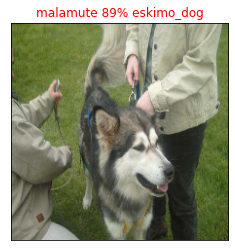

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=34)


* Plot the top 10 prediction probability values and labels,coloring the true label green


In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

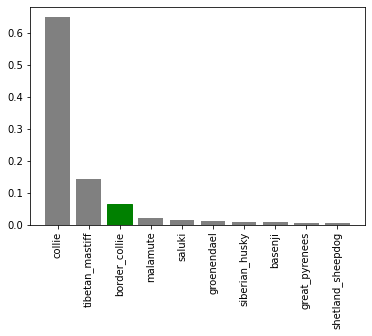

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

In [ ]:
predictions[0]

array([4.58273164e-04, 2.79680156e-04, 1.89797464e-03, 2.42717957e-04,
       5.22527953e-05, 5.51159246e-06, 3.82008031e-02, 3.43148102e-04,
       1.33601614e-04, 6.48092537e-04, 2.84971262e-04, 1.58364477e-04,
       1.12609196e-04, 4.97489236e-05, 8.21890135e-04, 2.99300504e-04,
       5.52802449e-05, 8.50180238e-02, 1.26397339e-04, 4.59639632e-05,
       1.36772427e-03, 3.07498907e-04, 1.38572523e-05, 1.72319100e-03,
       3.52011812e-05, 1.29762839e-03, 3.89397919e-01, 3.90004789e-05,
       3.54582764e-04, 6.07166323e-04, 5.69008334e-05, 5.92903409e-04,
       1.45098788e-03, 4.11446763e-06, 2.04348962e-05, 3.78899649e-02,
       6.25610846e-05, 4.12341396e-05, 3.04659014e-04, 1.28584608e-04,
       1.52926228e-03, 1.90420615e-05, 5.78373074e-05, 1.02945902e-04,
       2.14404172e-05, 6.48995556e-05, 3.16543810e-05, 2.68993608e-04,
       1.02795800e-03, 3.13183438e-04, 4.33254572e-05, 1.27215826e-04,
       1.34501679e-04, 1.28792017e-04, 1.49757820e-04, 3.09920797e-05,
      

In [ ]:
predictions[0].argsort()[-10:][::-1]

array([ 26,  59,  17,  65, 102,   6,  35, 103, 106,  73])

In [ ]:
unique_breeds[predictions[0].argsort()[-10:][::-1]]

array(['cairn', 'irish_wolfhound', 'border_terrier', 'komondor',
       'silky_terrier', 'australian_terrier', 'dandie_dinmont',
       'soft-coated_wheaten_terrier', 'standard_schnauzer', 'maltese_dog'],
      dtype=object)

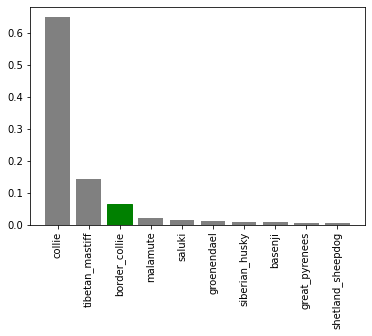

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

#### Now that we got our function to help us visualize our prediction and evaluate our model

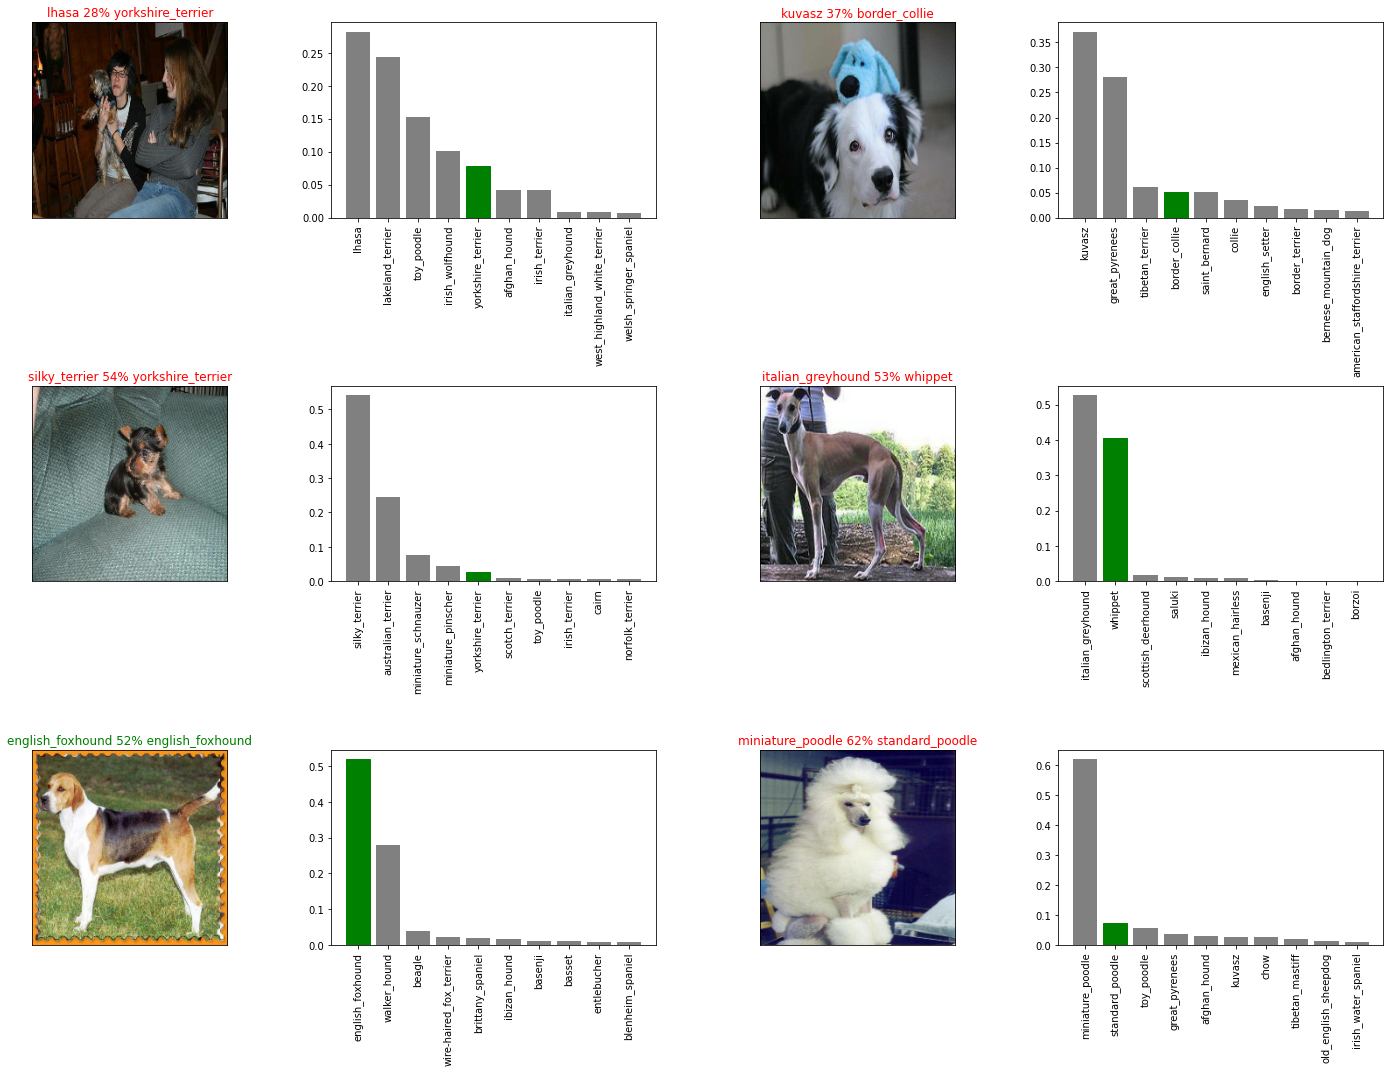

In [ ]:
# Lets check out a few prediction and their different values
i_multiplier= 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
           labels=val_labels,
           images=val_images,
           n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directoy and appends a suffix (string)

  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Found DOg/models",
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f'Saving a model to: {model_path}...')
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from specified path
  """
  print(f"Loading saved model from:{model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got function to save and load a trained model, let's make sure they work

In [ ]:
 # Save our model trained on 100 images
 # actually it tells about our models so when some one browsing our directory for model it works as description lil bit about our model
 save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving a model to: /content/drive/MyDrive/Found DOg/models/20220707-20341657226052-1000-images-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Found DOg/models/20220707-20341657226052-1000-images-mobilenetv2-Adam.h5'

In [ ]:
#Load  our trained model
loaded_1000_image_model = load_model('/content/drive/MyDrive/Found DOg/models/20220707-10111657188687-1000-images-mobilenetv2-Adam.h5')

Loading saved model from:/content/drive/MyDrive/Found DOg/models/20220707-10111657188687-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved modek
model.evaluate(val_data)

7/7 [==============================] - 1s 84ms/step - loss: 1.2163 - accuracy: 0.6750


[1.2163151502609253, 0.675000011920929]

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 89ms/step - loss: 1.2530 - accuracy: 0.6800


[1.252950668334961, 0.6800000071525574]

# Training a model  on full dataset

In [ ]:
len(x),len(y)


(10222, 10222)

In [ ]:
# Create a data batch with full data set
full_data=create_data_batches(x,y)

Creating Training data batches...


In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard=create_tensorboard_callback()
# No validation set when training on all data, so we cant monitor validation accuracy
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=3)


Note- it will take approx 30min-1hrs as model is very big

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 40s 113ms/step - loss: 1.3401 - accuracy: 0.6713
Epoch 2/100
320/320 [==============================] - 33s 104ms/step - loss: 0.3990 - accuracy: 0.8829
Epoch 3/100
320/320 [==============================] - 35s 108ms/step - loss: 0.2393 - accuracy: 0.9359
Epoch 4/100
320/320 [==============================] - 36s 113ms/step - loss: 0.1574 - accuracy: 0.9597
Epoch 5/100
320/320 [==============================] - 37s 115ms/step - loss: 0.1061 - accuracy: 0.9787
Epoch 6/100
320/320 [==============================] - 36s 113ms/step - loss: 0.0766 - accuracy: 0.9876
Epoch 7/100
320/320 [==============================] - 37s 115ms/step - loss: 0.0598 - accuracy: 0.9902
Epoch 8/100
320/320 [==============================] - 39s 121ms/step - loss: 0.0459 - accuracy: 0.9951
Epoch 9/100
320/320 [==============================] - 42s 131ms/step - loss: 0.0378 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] - 43s 134m

In [ ]:
save_model(full_model, suffix="full-image-set-mobilevnet-adam")

Saving a model to: /content/drive/MyDrive/Found DOg/models/20220707-20471657226837-full-image-set-mobilevnet-adam.h5...


'/content/drive/MyDrive/Found DOg/models/20220707-20471657226837-full-image-set-mobilevnet-adam.h5'

In [ ]:
# loading the full model
loaded_full_model=load_model("/content/drive/MyDrive/Found DOg/models/20220707-12271657196837-full-image-set-mobilevnet-adam.h5")

Loading saved model from:/content/drive/MyDrive/Found DOg/models/20220707-12271657196837-full-image-set-mobilevnet-adam.h5


# Making prediction on test dataset


In [ ]:
# Load test image filenames
test_path = "/content/drive/MyDrive/Found DOg/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)] # list comprehension
test_filenames[:10]


['/content/drive/MyDrive/Found DOg/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7ce78e874945f182a4f5149aa505b09.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7dc8cc599049ea9fa2a172c88646c57.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7e9dd51302fe08c1c89a550e183cf07.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7e9624f2a2e61ab187358f5968bfde8.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7f95aabf775a636b3893ffa120adaf9.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7ed96b272013c6de9505a753816ce75.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7fcdf9671a6593b638cbee42842f981.jpg',
 '/content/drive/MyDrive/Found DOg/test/e800b6c8d2904e205d67ada800907762.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7feb64da6aae1ef8e62453f6660d0c5.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:

# Create test data batch
test_data = create_data_batches(test_filenames,test_data=True)


Creating test data batches.....


In [ ]:

test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make prediction on test data batch using loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 187s 547ms/step


In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("/content/drive/MyDrive/Found DOg/preds_array.csv",test_predictions,delimiter=",")

In [ ]:
#Load the predictions from csv file
test_predictions=np.loadtxt("/content/drive/MyDrive/Found DOg/preds_array.csv",delimiter=",")

In [ ]:
test_predictions[:10]

array([[3.08282239e-07, 1.10832832e-06, 8.73044002e-08, ...,
        5.82003804e-06, 1.68732450e-09, 1.89805121e-07],
       [2.86334853e-07, 1.96984581e-10, 2.45545789e-06, ...,
        3.58979430e-10, 1.41152057e-09, 1.59583323e-07],
       [2.34124695e-06, 2.13377565e-08, 1.16929080e-08, ...,
        1.12997729e-10, 1.89630521e-06, 1.73400565e-07],
       ...,
       [1.13763555e-15, 1.50411706e-13, 1.56036547e-14, ...,
        2.12460800e-12, 8.74860555e-14, 3.39315205e-16],
       [1.46127943e-10, 2.31262101e-12, 3.78681131e-09, ...,
        2.73429789e-04, 2.41961562e-08, 4.51726712e-11],
       [3.62723654e-07, 1.66024874e-05, 3.77022236e-09, ...,
        1.40080747e-08, 1.23394628e-07, 6.44388419e-05]])

In [ ]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions 



In [ ]:
# Create a pandas DataFrame with empty columns
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
test_filenames[:10]

['/content/drive/MyDrive/Found DOg/test/e7be7b911a4cba9fdfa4105ec4776370.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7ce78e874945f182a4f5149aa505b09.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7dc8cc599049ea9fa2a172c88646c57.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7e9dd51302fe08c1c89a550e183cf07.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7e9624f2a2e61ab187358f5968bfde8.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7f95aabf775a636b3893ffa120adaf9.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7ed96b272013c6de9505a753816ce75.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7fcdf9671a6593b638cbee42842f981.jpg',
 '/content/drive/MyDrive/Found DOg/test/e800b6c8d2904e205d67ada800907762.jpg',
 '/content/drive/MyDrive/Found DOg/test/e7feb64da6aae1ef8e62453f6660d0c5.jpg']

In [ ]:

# Append test image id to prediction DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)] # [0]-to remove jpgs
test_ids[:10]

['e7be7b911a4cba9fdfa4105ec4776370',
 'e7ce78e874945f182a4f5149aa505b09',
 'e7dc8cc599049ea9fa2a172c88646c57',
 'e7e9dd51302fe08c1c89a550e183cf07',
 'e7e9624f2a2e61ab187358f5968bfde8',
 'e7f95aabf775a636b3893ffa120adaf9',
 'e7ed96b272013c6de9505a753816ce75',
 'e7fcdf9671a6593b638cbee42842f981',
 'e800b6c8d2904e205d67ada800907762',
 'e7feb64da6aae1ef8e62453f6660d0c5']

In [ ]:
 os.path.splitext(test_filenames[0]) #example it split the last bit of part

('/content/drive/MyDrive/Found DOg/test/e7be7b911a4cba9fdfa4105ec4776370',
 '.jpg')

In [ ]:
preds_df['id']=test_ids
preds_df[:5]

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e7be7b911a4cba9fdfa4105ec4776370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e7ce78e874945f182a4f5149aa505b09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e7dc8cc599049ea9fa2a172c88646c57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e7e9dd51302fe08c1c89a550e183cf07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e7e9624f2a2e61ab187358f5968bfde8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e7be7b911a4cba9fdfa4105ec4776370,3.082822e-07,1.108328e-06,8.730440e-08,1.466977e-07,4.050954e-10,3.929752e-09,1.518227e-10,8.456145e-10,4.442607e-10,...,1.741241e-09,7.867476e-12,1.122091e-11,2.378239e-09,2.442240e-10,7.124316e-11,2.094190e-09,5.820038e-06,1.687325e-09,1.898051e-07
1,e7ce78e874945f182a4f5149aa505b09,2.863349e-07,1.969846e-10,2.455458e-06,7.500977e-14,2.563760e-09,7.819170e-08,6.997220e-09,4.734691e-09,1.186178e-10,...,4.381408e-08,1.273441e-08,8.823629e-09,3.179906e-11,6.286208e-09,7.932677e-11,1.650987e-09,3.589794e-10,1.411521e-09,1.595833e-07
2,e7dc8cc599049ea9fa2a172c88646c57,2.341247e-06,2.133776e-08,1.169291e-08,1.464717e-10,5.510732e-07,6.794055e-09,3.050358e-09,2.254869e-08,4.060658e-11,...,1.307667e-07,2.120933e-08,1.246590e-08,2.685764e-08,7.831135e-09,5.060009e-09,7.474225e-07,1.129977e-10,1.896305e-06,1.734006e-07
3,e7e9dd51302fe08c1c89a550e183cf07,3.112742e-05,3.653890e-08,3.015840e-09,1.799327e-08,9.008929e-08,1.336837e-09,1.622355e-02,4.816918e-09,1.375922e-10,...,2.275217e-08,5.183789e-04,1.322276e-09,2.210849e-10,2.623547e-09,3.133356e-10,3.042177e-06,8.770260e-08,3.940786e-07,9.826589e-01
4,e7e9624f2a2e61ab187358f5968bfde8,5.276001e-09,1.225943e-10,9.904355e-10,3.039891e-11,5.903944e-08,2.465189e-08,1.078566e-10,1.479339e-08,3.523222e-08,...,1.287418e-08,1.945878e-08,3.744467e-08,1.518753e-08,5.106977e-10,2.750187e-07,1.056977e-08,1.434573e-09,3.180160e-09,1.670707e-09


In [ ]:
# To export to csv (save our prediction dataframe to csv for submission to Kaggle)
preds_df.to_csv("/content/drive/MyDrive/Found DOg/full_model_predictions_submission_1_mobilenetv2.csv",
                index=False)

# Making prediction on custom images




In [ ]:
# Get the custom image filepath
custom_path = "/content/drive/MyDrive/Found DOg/custom data set/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['/content/drive/MyDrive/Found DOg/custom data set/dog.jpg',
 '/content/drive/MyDrive/Found DOg/custom data set/download (4).jpg',
 '/content/drive/MyDrive/Found DOg/custom data set/dog-that-looks-like-wolf.jpg']

In [ ]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches.....


In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

(3, 120)

Now we've got some predictions arrays, let's convert them to labels and compare them with each image.

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['german_shepherd', 'eskimo_dog', 'eskimo_dog']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

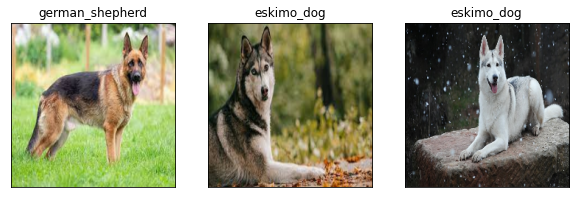

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)